#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [2]:
df = pd.read_csv('vehicle_data.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [3]:
df.shape
# rows = 398,cols=9

(398, 9)

### Data Preprocessing

#### 1) Handling Null Values

In [4]:
def count_per_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Features':nv.index,'Count_Null':nv.values,
                         'Per_Null': (nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [5]:
res = count_per_null(df)
res

,Features,Count_Null,Per_Null


#### 2) Handling duplicates

In [6]:
df.duplicated().sum()

0

#### 3) Check data types

In [7]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [8]:
# df['horsepower'] = pd.to_numeric(df['horsepower'])

df['horsepower'] = df['horsepower'].astype(int)

ValueError: invalid literal for int() with base 10: '?'

In [9]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
df[df['horsepower']=='?'].shape

(6, 9)

In [11]:
df = df[df['horsepower']!='?']
df.shape

(392, 9)

In [12]:
df['horsepower'] = df['horsepower'].astype(int)
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower               int32
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [13]:
print(df['name'].nunique())

301


In [14]:
301/392

0.7678571428571429

In [15]:
df['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [16]:
chev_names = [i for i in df['name'] if i.startswith('chevr')]
print(len(chev_names))
print(chev_names)

44
['chevrolet chevelle malibu', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'chevrolet chevelle malibu', 'chevrolet impala', 'chevrolet vega (sw)', 'chevrolet vega', 'chevrolet impala', 'chevrolet chevelle concours (sw)', 'chevrolet malibu', 'chevrolet caprice classic', 'chevrolet nova custom', 'chevrolet impala', 'chevrolet vega', 'chevrolet monte carlo s', 'chevrolet nova', 'chevrolet vega', 'chevrolet chevelle malibu classic', 'chevrolet nova', 'chevrolet bel air', 'chevroelt chevelle malibu', 'chevrolet monza 2+2', 'chevrolet chevelle malibu classic', 'chevrolet nova', 'chevrolet chevette', 'chevrolet woody', 'chevrolet caprice classic', 'chevrolet concours', 'chevrolet monte carlo landau', 'chevrolet chevette', 'chevrolet malibu', 'chevrolet monte carlo landau', 'chevrolet chevette', 'chevrolet caprice classic', 'chevrolet malibu classic (sw)', 'chevrolet citation', 'chevrolet chevette', 'chevrolet citation', 'chevrolet citation', 'chevrolet cavalier', 'ch

In [17]:
toyota_names = [i for i in df['name'] if i.startswith('toyot') or 
                i.startswith('toyouta')]
print(len(toyota_names))
print(toyota_names)

26
['toyota corona mark ii', 'toyota corona', 'toyota corolla 1200', 'toyota corona hardtop', 'toyouta corona mark ii (sw)', 'toyota corolla 1600 (sw)', 'toyota carina', 'toyota mark ii', 'toyota corolla 1200', 'toyota corona', 'toyota corolla', 'toyota corona', 'toyota corolla', 'toyota mark ii', 'toyota corolla liftback', 'toyota corona', 'toyota celica gt liftback', 'toyota corolla tercel', 'toyota corona liftback', 'toyota corolla', 'toyota starlet', 'toyota tercel', 'toyota corolla', 'toyota cressida', 'toyota corolla', 'toyota celica gt']


In [18]:
ford_names = [i for i in df['name'] if i.startswith('ford')]
print(len(ford_names))
print(ford_names)

48
['ford torino', 'ford galaxie 500', 'ford maverick', 'ford f250', 'ford torino 500', 'ford galaxie 500', 'ford country squire (sw)', 'ford mustang', 'ford pinto runabout', 'ford galaxie 500', 'ford gran torino (sw)', 'ford pinto (sw)', 'ford gran torino', 'ford ltd', 'ford maverick', 'ford country', 'ford pinto', 'ford pinto', 'ford gran torino', 'ford gran torino (sw)', 'ford maverick', 'ford ltd', 'ford mustang ii', 'ford pinto', 'ford pinto', 'ford gran torino', 'ford maverick', 'ford granada ghia', 'ford pinto', 'ford f108', 'ford granada', 'ford thunderbird', 'ford mustang ii 2+2', 'ford fiesta', 'ford fairmont (auto)', 'ford fairmont (man)', 'ford futura', 'ford fairmont 4', 'ford ltd landau', 'ford country squire (sw)', 'ford fairmont', 'ford escort 4w', 'ford escort 2h', 'ford granada gl', 'ford fairmont futura', 'ford granada l', 'ford mustang gl', 'ford ranger']


In [19]:
amc_names = [i for i in df['name'] if i.startswith('amc')]
print(len(amc_names))
print(amc_names)

27
['amc rebel sst', 'amc ambassador dpl', 'amc hornet', 'amc gremlin', 'amc gremlin', 'amc matador', 'amc hornet sportabout (sw)', 'amc ambassador sst', 'amc matador (sw)', 'amc matador', 'amc ambassador brougham', 'amc hornet', 'amc gremlin', 'amc hornet', 'amc matador', 'amc matador (sw)', 'amc matador', 'amc gremlin', 'amc pacer', 'amc matador', 'amc hornet', 'amc pacer d/l', 'amc concord', 'amc concord d/l', 'amc concord dl 6', 'amc spirit dl', 'amc concord']


In [20]:
datsun_names = [i for i in df['name'] if i.startswith('datsun')]
print(len(datsun_names))
print(datsun_names)

23
['datsun pl510', 'datsun pl510', 'datsun 1200', 'datsun 510 (sw)', 'datsun 610', 'datsun b210', 'datsun 710', 'datsun 710', 'datsun b-210', 'datsun f-10 hatchback', 'datsun 810', 'datsun b210 gx', 'datsun 510', 'datsun 200-sx', 'datsun 210', 'datsun 310', 'datsun 510 hatchback', 'datsun 210', 'datsun 280-zx', 'datsun 210 mpg', 'datsun 200sx', 'datsun 810 maxima', 'datsun 310 gx']


In [21]:
amc_names = [i for i in df['name'] if i.startswith('amc')]
print(len(amc_names))
print(amc_names)

27
['amc rebel sst', 'amc ambassador dpl', 'amc hornet', 'amc gremlin', 'amc gremlin', 'amc matador', 'amc hornet sportabout (sw)', 'amc ambassador sst', 'amc matador (sw)', 'amc matador', 'amc ambassador brougham', 'amc hornet', 'amc gremlin', 'amc hornet', 'amc matador', 'amc matador (sw)', 'amc matador', 'amc gremlin', 'amc pacer', 'amc matador', 'amc hornet', 'amc pacer d/l', 'amc concord', 'amc concord d/l', 'amc concord dl 6', 'amc spirit dl', 'amc concord']


In [22]:
honda_names = [i for i in df['name'] if i.startswith('honda')]
print(len(honda_names))
print(honda_names)

13
['honda civic', 'honda civic cvcc', 'honda civic', 'honda accord cvcc', 'honda civic cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda accord', 'honda civic', 'honda civic (auto)']


In [23]:
dodge_names = [i for i in df['name'] if i.startswith('dodge')]
print(len(dodge_names))
print(dodge_names)

28
['dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'dodge colt', 'dodge colt', 'dodge coronet brougham', 'dodge aspen se', 'dodge d100', 'dodge monaco brougham', 'dodge colt m/m', 'dodge diplomat', 'dodge aspen', 'dodge magnum xe', 'dodge omni', 'dodge aspen 6', 'dodge st. regis', 'dodge colt hatchback custom', 'dodge aspen', 'dodge colt', 'dodge aries wagon (sw)', 'dodge aries se', 'dodge charger 2.2', 'dodge rampage']


In [24]:
# volkswagen
vol_names = [i for i in df['name'] if i.startswith('volkswagen') or 
            i.startswith('vw') or i.startswith('voks')]
print(len(vol_names))
print(vol_names)

22
['volkswagen 1131 deluxe sedan', 'volkswagen model 111', 'volkswagen type 3', 'volkswagen 411 (sw)', 'volkswagen super beetle', 'volkswagen dasher', 'volkswagen dasher', 'volkswagen rabbit', 'vw rabbit', 'volkswagen rabbit', 'volkswagen rabbit custom', 'volkswagen dasher', 'volkswagen rabbit custom diesel', 'volkswagen scirocco', 'vw rabbit custom', 'vw rabbit', 'vw rabbit c (diesel)', 'vw dasher (diesel)', 'vokswagen rabbit', 'volkswagen jetta', 'volkswagen rabbit l', 'vw pickup']


In [25]:
# maxda, pontiac, plymouth
maxda_names = [i for i in df['name'] if i.startswith('maxda') or 
               i.startswith('Maxda') or i.startswith('mazda')]
print(len(maxda_names))
print(maxda_names)

12
['mazda rx2 coupe', 'maxda rx3', 'mazda rx-4', 'mazda glc deluxe', 'maxda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda 626', 'mazda glc custom l', 'mazda glc custom']


In [26]:
mer_names = [i for i in df['name'] if i.startswith('mercu')]
print(len(mer_names))
print(mer_names)

11
['mercury capri 2000', 'mercury marquis', 'mercury marquis brougham', 'mercury capri v6', 'mercury monarch', 'mercury cougar brougham', 'mercury monarch ghia', 'mercury zephyr', 'mercury zephyr 6', 'mercury grand marquis', 'mercury lynx l']


In [27]:
merz_names = [i for i in df['name'] if i.startswith('mercedes')]
print(len(merz_names))
print(merz_names)

3
['mercedes-benz 280s', 'mercedes benz 300d', 'mercedes-benz 240d']


In [28]:
buick_names = [i for i in df['name'] if i.startswith('buick')]
print(len(buick_names))
print(buick_names)

17
['buick skylark 320', 'buick estate wagon (sw)', 'buick lesabre custom', 'buick century 350', 'buick electra 225 custom', 'buick century luxus (sw)', 'buick century', 'buick skyhawk', 'buick opel isuzu deluxe', 'buick skylark', 'buick century special', 'buick regal sport coupe (turbo)', 'buick estate wagon (sw)', 'buick skylark limited', 'buick skylark', 'buick century', 'buick century limited']


In [29]:
pontiac_names = [i for i in df['name'] if i.startswith('pontiac')]
print(len(pontiac_names))
print(pontiac_names)

16
['pontiac catalina', 'pontiac catalina brougham', 'pontiac safari (sw)', 'pontiac firebird', 'pontiac catalina', 'pontiac grand prix', 'pontiac catalina', 'pontiac astro', 'pontiac ventura sj', 'pontiac grand prix lj', 'pontiac sunbird coupe', 'pontiac phoenix lj', 'pontiac lemans v6', 'pontiac phoenix', 'pontiac j2000 se hatchback', 'pontiac phoenix']


In [30]:
ply_names = [i for i in df['name'] if i.startswith('plymouth')]
print(len(ply_names))
print(ply_names)

31
['plymouth satellite', 'plymouth fury iii', "plymouth 'cuda 340", 'plymouth duster', 'plymouth satellite custom', 'plymouth fury iii', 'plymouth cricket', 'plymouth fury iii', 'plymouth satellite custom (sw)', 'plymouth fury gran sedan', 'plymouth valiant', 'plymouth duster', 'plymouth custom suburb', 'plymouth duster', 'plymouth satellite sebring', 'plymouth valiant custom', 'plymouth grand fury', 'plymouth fury', 'plymouth valiant', 'plymouth volare premier v8', 'plymouth arrow gs', 'plymouth volare custom', 'plymouth volare', 'plymouth sapporo', 'plymouth horizon', 'plymouth horizon tc3', 'plymouth reliant', 'plymouth reliant', 'plymouth champ', 'plymouth horizon 4', 'plymouth horizon miser']


In [31]:
cadillac_names = [i for i in df['name'] if i.startswith('cadillac')]
print(len(cadillac_names))
print(cadillac_names)

2
['cadillac seville', 'cadillac eldorado']


In [32]:
opel_names = [i for i in df['name'] if i.startswith('opel')]
print(len(opel_names))
print(opel_names)

4
['opel 1900', 'opel manta', 'opel manta', 'opel 1900']


In [33]:
subaru_names = [i for i in df['name'] if i.startswith('subaru')]
print(len(subaru_names))
print(subaru_names)

4
['subaru', 'subaru dl', 'subaru dl', 'subaru']


In [34]:
old_names = [i for i in df['name'] if i.startswith('oldsmobile')]
print(len(old_names))
print(old_names)

10
['oldsmobile delta 88 royale', 'oldsmobile vista cruiser', 'oldsmobile omega', 'oldsmobile cutlass supreme', 'oldsmobile cutlass salon brougham', 'oldsmobile starfire sx', 'oldsmobile cutlass salon brougham', 'oldsmobile omega brougham', 'oldsmobile cutlass ls', 'oldsmobile cutlass ciera (diesel)']


In [35]:
audi_names = [i for i in df['name'] if i.startswith('audi')]
print(len(audi_names))
print(audi_names)

7
['audi 100 ls', 'audi 100ls', 'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)']


In [36]:
ren_names = [i for i in df['name'] if i.startswith('ren')]
print(len(ren_names))
print(ren_names)

3
['renault 12 (sw)', 'renault 12tl', 'renault 5 gtl']


In [37]:
bmw_names = [i for i in df['name'] if i.startswith('bmw')]
print(len(bmw_names))
print(bmw_names)

2
['bmw 2002', 'bmw 320i']


In [38]:
chevy_names = [i for i in df['name'] if i.startswith('chevy')]
print(len(chevy_names))
print(chevy_names)
saab_names = [i for i in df['name'] if i.startswith('saab')]
print(len(saab_names))
print(saab_names)
fiat_names = [i for i in df['name'] if i.startswith('fiat')]
print(len(fiat_names))
print(fiat_names)
peugeot_names = [i for i in df['name'] if i.startswith('peugeot')]
print(len(peugeot_names))
print(peugeot_names)
chrysler_names = [i for i in df['name'] if i.startswith('chrysler')]
print(len(chrysler_names))
print(chrysler_names)
volvo_names = [i for i in df['name'] if i.startswith('volvo')]
print(len(volvo_names))
print(volvo_names)

3
['chevy c20', 'chevy c10', 'chevy s-10']
4
['saab 99e', 'saab 99le', 'saab 99le', 'saab 99gle']
8
['fiat 124b', 'fiat 124 sport coupe', 'fiat 128', 'fiat 128', 'fiat 124 tc', 'fiat x1.9', 'fiat 131', 'fiat strada custom']
8
['peugeot 504', 'peugeot 304', 'peugeot 504 (sw)', 'peugeot 504', 'peugeot 504', 'peugeot 604sl', 'peugeot 504', 'peugeot 505s turbo diesel']
6
['chrysler newport royal', 'chrysler new yorker brougham', 'chrysler cordoba', 'chrysler lebaron town @ country (sw)', 'chrysler lebaron salon', 'chrysler lebaron medallion']
6
['volvo 145e (sw)', 'volvo 144ea', 'volvo 244dl', 'volvo 245', 'volvo 264gl', 'volvo diesel']


In [39]:
df['Brand'] = df['name']
# df.head()

In [40]:
df['Brand'] = df['Brand'].replace(chev_names,'Chev')
df['Brand'] = df['Brand'].replace(ford_names,'Ford')
df['Brand'] = df['Brand'].replace(datsun_names,'Datsun')
df['Brand'] = df['Brand'].replace(honda_names,'Honda')
df['Brand'] = df['Brand'].replace(ply_names,'Ply')
df['Brand'] = df['Brand'].replace(toyota_names,'Toyota')
df['Brand'] = df['Brand'].replace(amc_names,'AMC')
df['Brand'] = df['Brand'].replace(vol_names,'VW')
df['Brand'] = df['Brand'].replace(pontiac_names,'Pontaic')
df['Brand'] = df['Brand'].replace(buick_names,'Buick')
df['Brand'] = df['Brand'].replace(maxda_names,'Maxda')
df['Brand'] = df['Brand'].replace(dodge_names ,'Dodge')
df['Brand'] = df['Brand'].replace(mer_names,'Mercury')
df['Brand'] = df['Brand'].replace(merz_names , 'Merz')
df['Brand'] = df['Brand'].replace(audi_names,'Audi')
df['Brand'] = df['Brand'].replace(saab_names , 'Saab')
df['Brand'] = df['Brand'].replace(volvo_names,'Volvo')
df['Brand'] = df['Brand'].replace(chrysler_names , 'Chrys')
df['Brand'] = df['Brand'].replace(peugeot_names,'Peugeot')
df['Brand'] = df['Brand'].replace(fiat_names, 'Fiat')
df['Brand'] = df['Brand'].replace(old_names,'Oldnames')
df['Brand'] = df['Brand'].replace(chevy_names, 'chevy')
df['Brand'] = df['Brand'].replace(opel_names, 'Fiat')
df['Brand'] = df['Brand'].replace(subaru_names,'Subaru')
df['Brand'] = df['Brand'].replace(ren_names,'Renault')
df['Brand'] = df['Brand'].replace(cadillac_names, 'cadillac')
df['Brand'] = df['Brand'].replace(bmw_names, 'bmw')
df['Brand'].value_counts()

Ford                 48
Chev                 44
Ply                  31
Dodge                28
AMC                  27
Toyota               26
Datsun               23
VW                   22
Buick                17
Pontaic              16
Honda                13
Maxda                12
Fiat                 12
Mercury              11
Oldnames             10
Peugeot               8
Audi                  7
Chrys                 6
Volvo                 6
Subaru                4
Saab                  4
Renault               3
Merz                  3
chevy                 3
cadillac              2
bmw                   2
triumph tr7 coupe     1
hi 1200d              1
capri ii              1
nissan stanza xe      1
Name: Brand, dtype: int64

In [41]:
df['Brand'].unique()

array(['Chev', 'Buick', 'Ply', 'AMC', 'Ford', 'Pontaic', 'Dodge',
       'Toyota', 'Datsun', 'VW', 'Peugeot', 'Audi', 'Saab', 'bmw',
       'chevy', 'hi 1200d', 'Mercury', 'Fiat', 'Oldnames', 'Chrys',
       'Maxda', 'Volvo', 'Renault', 'Honda', 'Subaru', 'capri ii', 'Merz',
       'cadillac', 'triumph tr7 coupe', 'nissan stanza xe'], dtype=object)

In [46]:
### EDA:
cat_colmns=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(cat_colmns)
print(num_cols)

Index(['name', 'Brand'], dtype='object')
Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')


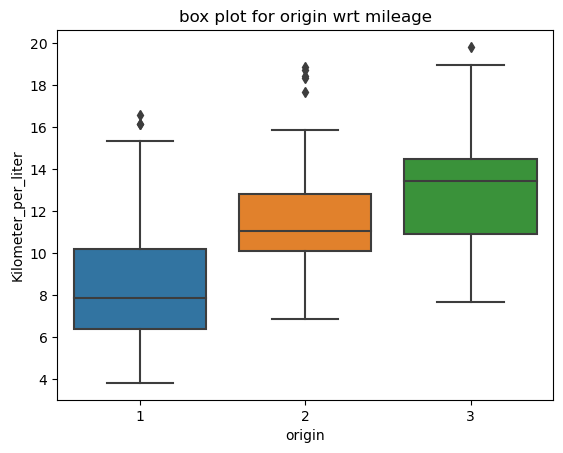

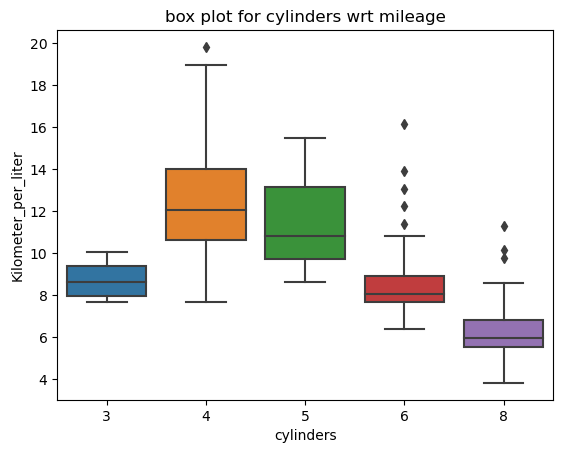

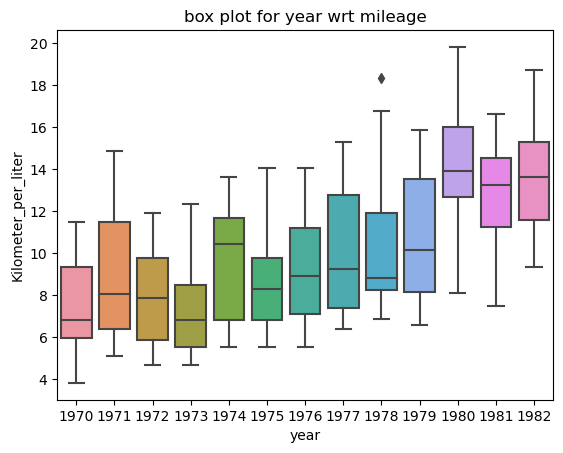

In [51]:
for i in ['origin','cylinders','year']:  #ye teeno bhi categorical but numeric columns hain
    sns.boxplot(x=df[i],y=df['Kilometer_per_liter'])
    plt.title(f"box plot for {i} wrt mileage")
    plt.show()

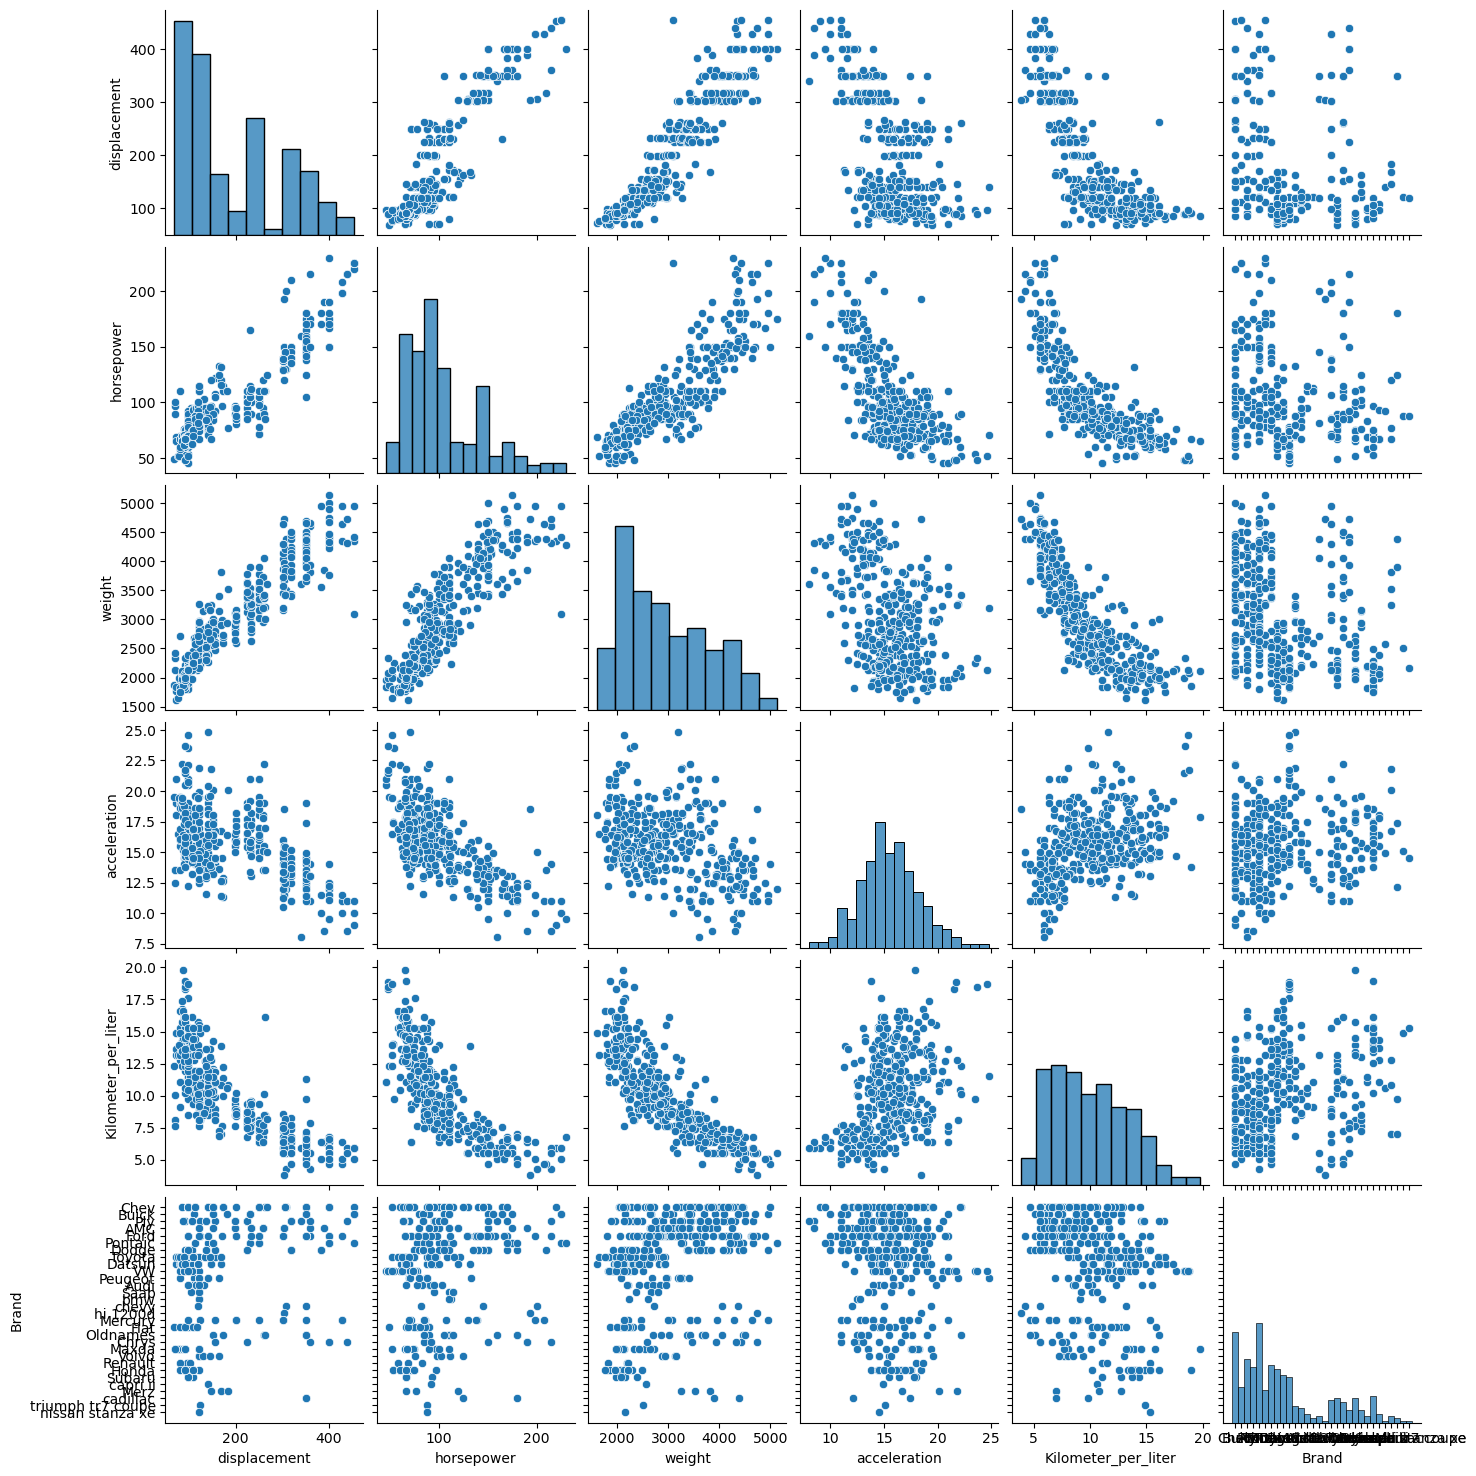

In [55]:
sns.pairplot(data=df,vars=['displacement','horsepower','weight','acceleration','Kilometer_per_liter','Brand'])
plt.show()

In [60]:
import statsmodels.api as sm

In [56]:
#ols model
x=df.drop(['name','Brand','Kilometer_per_liter'],axis=1)
y=np.log(df['Kilometer_per_liter'])
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [58]:
x1=x.copy()
y1=y.copy()

In [69]:
x1=sm.add_constant(x1)
ols_m1=sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.877
Method:                  Least Squares   F-statistic:                     400.4
Date:                 Tue, 25 Jul 2023   Prob (F-statistic):          3.98e-172
Time:                         12:44:09   Log-Likelihood:                 281.90
No. Observations:                  392   AIC:                            -547.8
Df Residuals:                      384   BIC:                            -516.0
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -55.2977      3.614    -15.300      0.000     -62.404     -48.191
origin           0.0407      0.010      4.089      0.000       0.021       0.060
cylinders       -0.0279      0.012     -2.415      0.016      -0.051      -0.005
displacement     0.0006      0.000      2.365      0.019       0.000       0.001
horsepower      -0.0015      0.000     -2.989      0.003      -0.002      -0.001
weight          -0.0003   2.33e-05    -10.931      0.000      -0.000      -0.000
acceleration    -0.0013      0.004     -0.381      0.703      -0.008       0.006
year             0.0296      0.002     16.211      0.000       0.026       0.033
==============================================================================
Omnibus:                        7.884   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               10.954
Skew:                          -0.148   Prob(JB):                      0.00418
Kurtosis:                       3.763   Cond. No.                     2.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

0.8795101907644159
0.8773137619502256


In [71]:
x2=df.drop(['name','Brand','Kilometer_per_liter','acceleration'],axis=1)
y2=y1.copy()


In [72]:
x2=sm.add_constant(x2)
ols_m2=sm.OLS(y2,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.879
Model:                             OLS   Adj. R-squared:                  0.878
Method:                  Least Squares   F-statistic:                     468.2
Date:                 Tue, 25 Jul 2023   Prob (F-statistic):          1.90e-173
Time:                         12:44:12   Log-Likelihood:                 281.82
No. Observations:                  392   AIC:                            -549.6
Df Residuals:                      385   BIC:                            -521.8
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -55.4289      3.594    -15.423      0.000     -62.495     -48.363
origin           0.0407      0.010      4.090      0.000       0.021       0.060
cylinders       -0.0277      0.012     -2.402      0.017      -0.050      -0.005
displacement     0.0006      0.000      2.419      0.016       0.000       0.001
horsepower      -0.0014      0.000     -3.505      0.001      -0.002      -0.001
weight          -0.0003   2.04e-05    -12.693      0.000      -0.000      -0.000
year             0.0296      0.002     16.309      0.000       0.026       0.033
==============================================================================
Omnibus:                        7.713   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               10.368
Skew:                          -0.159   Prob(JB):                      0.00561
Kurtosis:                       3.731   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

0.8794646346508015
0.8775861614245802


In [ ]:
from sklearn.model,y_test=test_test_split(3,y3,test_size=0.30,random_state)

In [74]:
#include brand in building the model and drop name